In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import os

# List all input files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if not "chart" in filename:
            print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/think-cell-datathon/sample_submission.csv
/kaggle/input/think-cell-datathon/val_and_test.csv
/kaggle/input/think-cell-datathon/train.csv


In [2]:
def load_pie_data(filepath):
    # Load data from CSV file into a DataFrame
    data = pd.read_csv(filepath)

    # Convert string representation of lists back to actual lists
    list_data_features = ["boxes", "start_angles", "end_angles", "angles", "percentages"]
    for column in list_data_features:
        data[column] = data[column].apply(ast.literal_eval)

    return data

train_df = load_pie_data("/kaggle/input/think-cell-datathon/train.csv")


In [3]:
print("Number of training images:", len(train_df))
train_df.head(n=3)

Number of training images: 10000


,id,filename,boxes,start_angles,end_angles,angles,percentages
0,0,chart_0.png,"[[268, 144, 268, 148, 163, 144], [268, 148, 16...","[90.0, 92.18164140355147, 178.9087837747374]","[92.18164140355147, 178.9087837747374, 450.0]","[2.181641403551466, 86.72714237118595, 271.091...","[0.6060115009865183, 24.090872880884987, 75.30..."
1,1,chart_1.png,"[[287, 143, 287, 147, 181, 142], [287, 147, 20...","[90.54051018713066, 92.70062933739528, 168.055...","[92.70062933739528, 168.05582281155367, 450.54...","[2.160119150264622, 75.35519347415838, 282.484...","[0.6000330972957283, 20.931998187266217, 78.46..."
2,2,chart_2.png,"[[302, 94, 217, 332, 302, 228], [217, 332, 178...","[0.0, 219.2593933610481, 291.9605640200965, 33...","[219.2593933610481, 291.9605640200965, 330.945...","[219.2593933610481, 72.70117065904839, 38.9848...","[60.90538704473558, 20.19476962751344, 10.8291..."


Chart: chart_0.png
Start Angle: 90.0
Percentages: [0.6060115009865183, 24.090872880884987, 75.3031156181285]


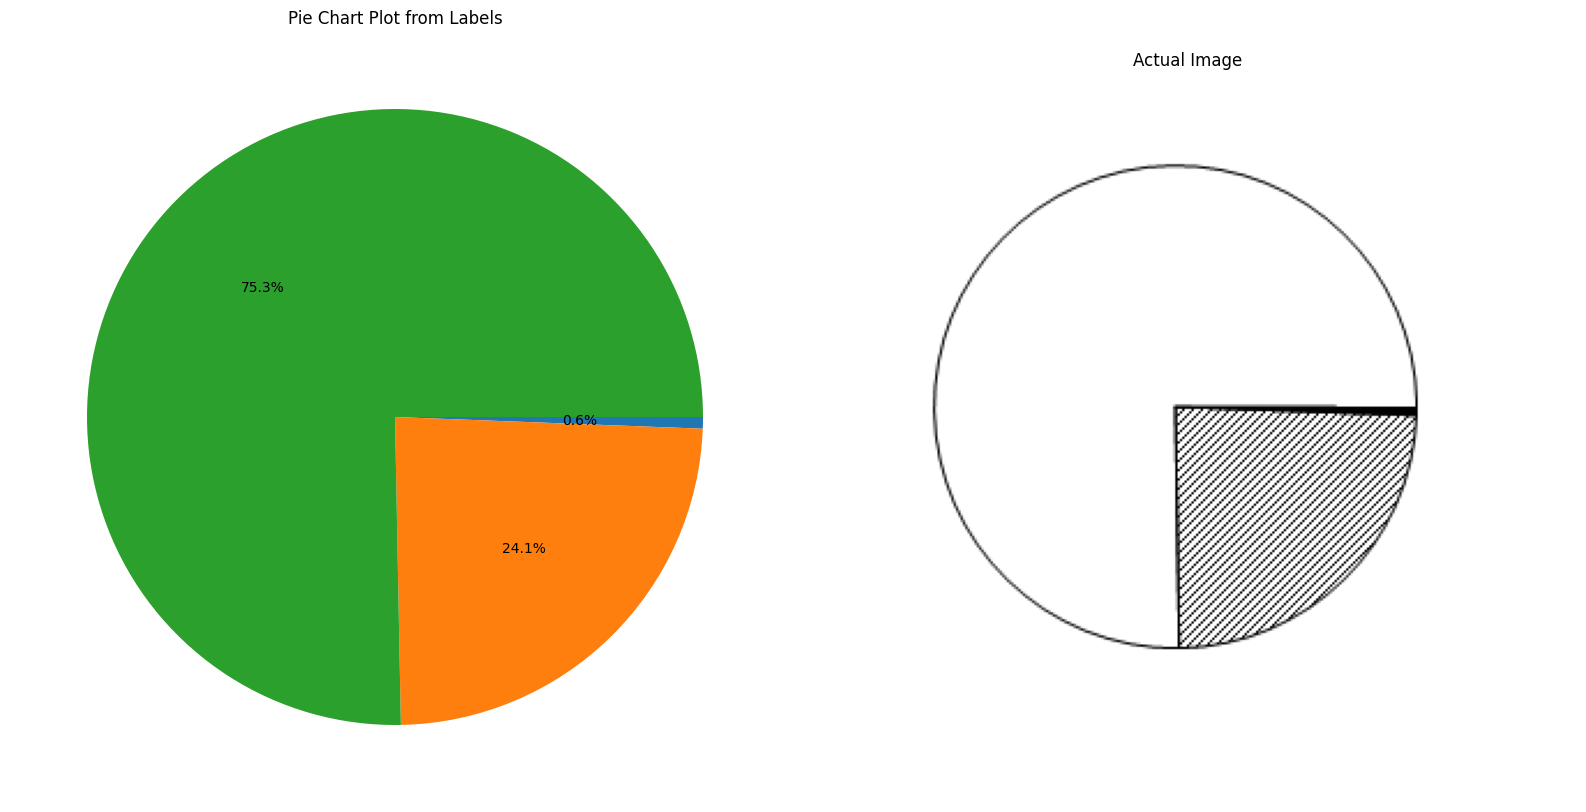

In [4]:
chart_idx = 0
chart_dict = train_df.loc[chart_idx]

print("Chart:", chart_dict["filename"])
print("Start Angle:", chart_dict["start_angles"][0])
print("Percentages:", chart_dict["percentages"])

# In matplotlib, 90° is the top and it adds segments counter-clockwise
# (use a negative sign to add them in clockwise order)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart from labels
ax[0].pie(
    chart_dict["percentages"],
    startangle=90 - chart_dict["start_angles"][0],
    counterclock=False,
    autopct='%1.1f%%',
)
ax[0].set_title("Pie Chart Plot from Labels")

# Load and display the actual image of the chart
image_path = f"/kaggle/input/think-cell-datathon/images/images/{chart_dict['filename']}"
img = plt.imread(image_path)
ax[1].imshow(img)
ax[1].axis("off")
ax[1].set_title("Actual Image")
plt.tight_layout()
plt.show()